In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
#import libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
#get data file
mlb_data='https://docs.google.com/spreadsheets/d/e/2PACX-1vS2HXPw7qJMK-M2KwyJKdFn9I6jrJFgv2Dq5lHfC519UcTZjXqtwu9fkaQ9FFY8pRwORq48omi1CN1J/pub?output=csv'
realdata="https://docs.google.com/spreadsheets/d/e/2PACX-1vSHRaBIdC4ZSxeqIisi_Y-IsZch7LUvHZAAP77raoGaQkfjNaqKExXKM6y2u89IMX-mVUQftCoSFDJt/pub?output=csv"

In [ ]:
#load data to panda dataframe
mlb_data=pd.read_csv(mlb_data, error_bad_lines=False)
#add a column for manipulating score
#apr2017['add2']=apr2017['score']+.2
#check format
mlb_data.head()

In [ ]:
#set features for the model
mlb_data= mlb_data[['score','w']]
#make sure boolean column is set to integer
mlb_data['w'] = mlb_data['w'].astype('int')
#check data structure
mlb_data.head()

In [6]:
#define x for the dataset
X = np.asarray(mlb_data[['score']])
#view first 5 records
X[0:5]

array([[ 0.17],
       [ 0.21],
       [-0.67],
       [-2.02],
       [ 0.13]])

In [7]:
#define y for dataset
y = np.asarray(mlb_data['w'])
#view first 5 records
y [0:5]

array([0, 0, 0, 1, 0])

In [8]:
#normalize the dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.45237102],
       [ 0.5062684 ],
       [-0.67947398],
       [-2.4985106 ],
       [ 0.39847364]])

In [9]:
#create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (855, 1) (855,)
Test set: (856, 1) (856,)


In [10]:
#model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
#predict with test set
yhat = LR.predict(X_test)

In [12]:
yhat_prob = LR.predict_proba(X_test)

In [13]:
#evaluate with jaccard
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.5210280373831776

In [14]:
#evaluate with confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 12 404]
 [  6 434]]


Confusion matrix, without normalization
[[ 12 404]
 [  6 434]]


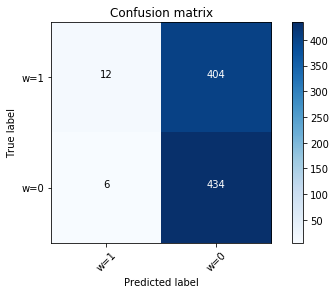

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['w=1','w=0'],normalize= False,  title='Confusion matrix')

In [16]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.52      0.99      0.68       440
           1       0.67      0.03      0.06       416

   micro avg       0.52      0.52      0.52       856
   macro avg       0.59      0.51      0.37       856
weighted avg       0.59      0.52      0.38       856



In [17]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6936613015089644

In [18]:
#model testing
#load data to panda dataframe
data=pd.read_csv(realdata, error_bad_lines=False)
#add a column for manipulating score
#apr2017['add2']=apr2017['score']+.2
#check format
data.head()

,score
0,0.20
1,0.29
2,-0.16
3,-0.02
4,-0.93


In [19]:
#predict with real set
yhatreal = LR.predict(data)

In [24]:
results=pd.DataFrame(yhatreal)

In [21]:
# Save dataframe as csv file to storage
project.save_data(data=results.to_csv(index=False),file_name='results.csv',overwrite=True)

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': '2017nbamodel-donotdelete-pr-qmkbf25fealawx',
 'asset_id': '290a2603-d56f-495b-8040-8147464dbe31'}